#Sentiment Analysis

What is Sentiment Analysis?

The algorithms of sentiment analysis principally specialize in process opinions, attitudes, and even emoticons in an exceedingly corpus of texts. The vary of established sentiments considerably varies from one technique to a different. whereas a customary analyzer defines up to a few basic polar emotions (positive, negative, neutral), the limit of additional advanced models is broader.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
trump= pd.read_csv('/content/drive/MyDrive/3..US Elections/Bidenall2.csv')
biden=pd.read_csv('/content/drive/MyDrive/3..US Elections/Trumpall2.csv')


In [ ]:
trump.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [ ]:
biden.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [ ]:
trump['text']

0         @JoeBiden And we’ll find out who won in 2026...
1       @JoeBiden Your Democratic Nazi Party cannot be...
2                             @JoeBiden So did Lying Barr
3       @JoeBiden It's clear you didnt compose this tw...
4              @JoeBiden I will vote in person thank you.
                              ...                        
2535    @JoeBiden You'll just try to calm those waters...
2536    @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...
2537    @JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...
2538    @JoeBiden Trump wants our children back at sch...
2539    @JoeBiden ... and I know, because it’s much co...
Name: text, Length: 2540, dtype: object

In [ ]:
# !pip install textblob


Let’s see some basics of TextBlob, It uses NLTK (Natural Language ToolKit) and the input contains a single sentence, The output of TextBlob is polarity and subjectivity. Polarity score lies between (-1 to 1) where -1 identifies the most negative words such as ‘disgusting’, ‘awful’, ‘pathetic’, and 1 identifies the most positive words like ‘excellent’, ‘best’. Subjectivity score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information. I was more concerned about the Polarity score as my objective was not to identify factual information, so I skipped the subjectivity score in my project.

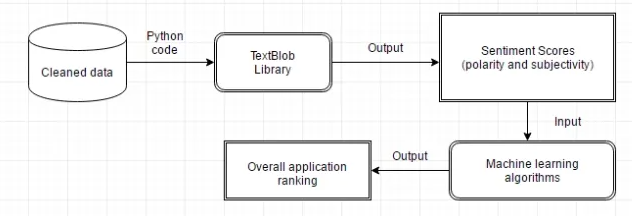

In [ ]:
from textblob import TextBlob

In [ ]:
textblob1=TextBlob(trump['text'][0])
textblob1.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

Observation: We can see the output is categorized between two — Polarity and Subjectivity.

Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

In [ ]:
 def find_pol(review):
   return TextBlob(review).sentiment.polarity

In [ ]:
trump['sentiment_polarity']=trump['text'].apply(find_pol)


In [ ]:
trump.head()

,user,text,sentiment_polarity
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00
2,OldlaceA,@JoeBiden So did Lying Barr,0.00
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00


In [ ]:
biden["sentiment_polarity"]=biden['text'].apply(find_pol)

In [ ]:
biden.head()

,user,text,sentiment_polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50
4,James09254677,After 4 years you think you would have figure...,0.00


You can use the NumPy where() function to quickly update the values in a NumPy array using if-else logic.

For example, the following code shows how to update the values in a NumPy array that meet a certain condition:
Here’s the basic syntax using the NumPy where() function:
x = np.where(condition, value_if_true, value_if_false)

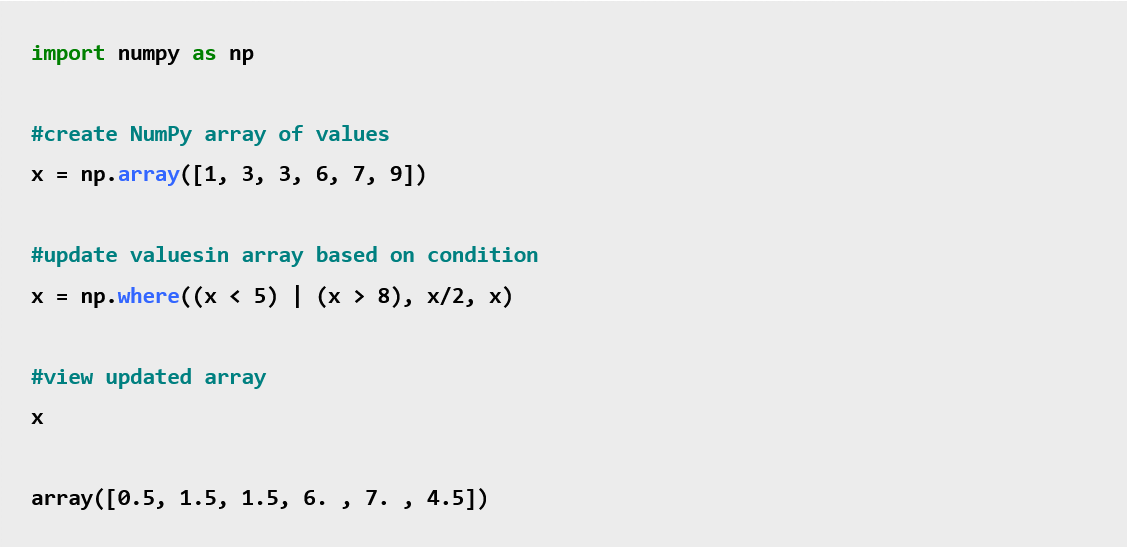

In [ ]:
trump['Expression Label']=np.where(trump['sentiment_polarity']>0,'positive','negative')


In [ ]:
biden['Expression Label']=np.where(biden['sentiment_polarity']>0,'positive','negative')

In [ ]:
biden.head()

,user,text,sentiment_polarity,Expression Label
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05,positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00,negative
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50,negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50,positive
4,James09254677,After 4 years you think you would have figure...,0.00,negative


In [ ]:
trump['Expression Label']=np.where(trump['sentiment_polarity']==0,'neutral',trump['Expression Label'])
trump.head()

,user,text,sentiment_polarity,Expression Label
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.00,neutral
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.00,neutral
2,OldlaceA,@JoeBiden So did Lying Barr,0.00,neutral
3,penblogger,@JoeBiden It's clear you didnt compose this tw...,0.05,positive
4,Aquarian0264,@JoeBiden I will vote in person thank you.,0.00,neutral


In [ ]:
biden['Expression Label']=np.where(biden['sentiment_polarity']==0,'neutral',biden['Expression Label'])
biden.head()

,user,text,sentiment_polarity,Expression Label
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05,positive
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00,neutral
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50,negative
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50,positive
4,James09254677,After 4 years you think you would have figure...,0.00,neutral


make simple filter to know take out all neutral from data

In [ ]:
filter=trump['Expression Label']!='neutral'
tr_data=trump[filter]

In [ ]:
tr_data.shape

(1031, 4)

In [ ]:
filter2=biden['Expression Label']!='neutral'
bi_data=biden[filter2]

In [ ]:
bi_data.shape

(1324, 4)

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [ ]:
bi_data.groupby('Expression Label').count()

,user,text,sentiment_polarity
Expression Label,,,
negative,597,597,597
positive,727,727,727


In [ ]:
bi_data['Expression Label'].value_counts()

positive    727
negative    597
Name: Expression Label, dtype: int64

In [ ]:
positive = (bi_data['Expression Label'].value_counts()[0]/1324)*100
negative=(bi_data['Expression Label'].value_counts()[1]/1324)*100
positive

54.909365558912384

In [ ]:
tr_data.groupby('Expression Label').count()

,user,text,sentiment_polarity
Expression Label,,,
negative,407,407,407
positive,624,624,624


In [ ]:
tr_data['Expression Label'].value_counts()

positive    624
negative    407
Name: Expression Label, dtype: int64

In [ ]:
positive1 = (tr_data['Expression Label'].value_counts()[0]/1031)*100
negative1=(tr_data['Expression Label'].value_counts()[1]/1031)*100
positive1

60.52376333656644

In [ ]:
politicians=['Donald Trump','Joe Biden']
list_pos=[positive1,positive]
list_neg=[negative1,negative]

In [ ]:
import plotly
from plotly import graph_objs as go

#visualization datasets

In [ ]:
fig= go.Figure(data=[
                     go.Bar(name='positive',x=politicians,y=list_pos),
                     go.Bar(name='negative',x=politicians,y=list_neg)
])
fig.show()

 TextBlob Advantages and Disadvantages:

Advantages:
1. TextBlob is built on the shoulders of NLTK and Pattern, therefore it is simple for beginners by providing an intuitive interface to NLTK.
2. TextBlob provides functions such as language translation and detection which is powered by Google Translate.

Disadvantages:
1. TextBlob is little slower in the comparison to spacy but faster than NLTK. (Spacy > TextBlob > NLTK)
2. TextBlob does not provide features like dependency parsing, word vectors etc. which is provided by spacy